Tommaso Peritore

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import activations

#center graphs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# 11.3

Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

## Solution

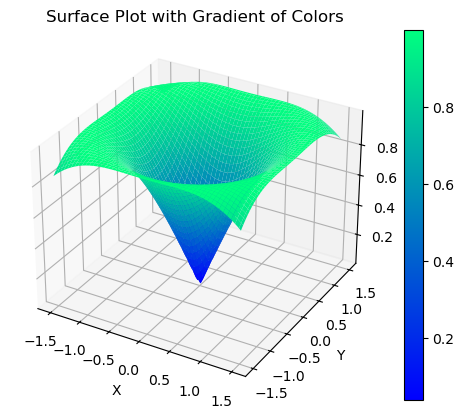

In [3]:
# problem parameters

# Generate data
x = np.linspace(-3/2, 3/2, 100)
y = np.linspace(-3/2, 3/2, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# function we are fitting
def f(x, y):
	 return np.sin(np.sqrt(x**2 + y**2))

# Plot the surface, to deprecate
# Create figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface with a gradient of colors
surf = ax.plot_surface(X, Y, Z, cmap='winter')
# Add colorbar
fig.colorbar(surf)
# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface Plot with Gradient of Colors')
# Show the plot
plt.show()


# generate training parameters
N_epochs = 30
N_train = 1000 # <<< train
N_valid = 50 # <<< test
sigma = 0.2
bach_size = 32

<Figure size 700x400 with 0 Axes>

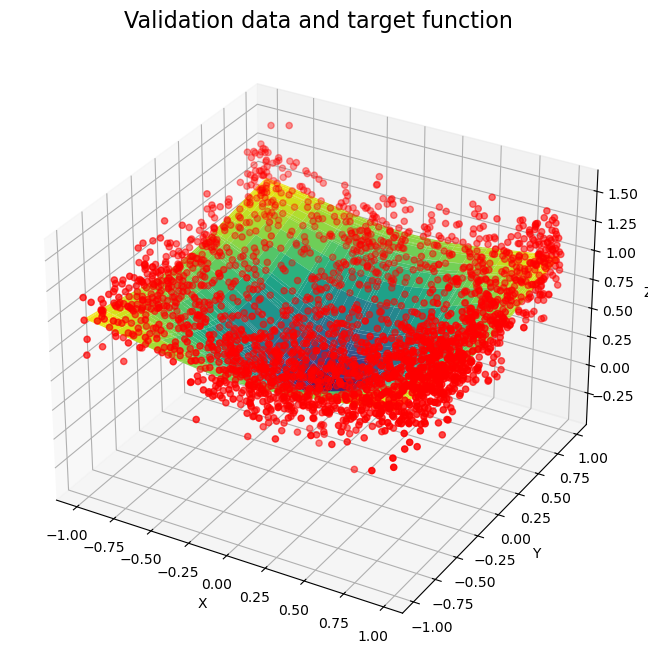

In [4]:
# Generate input data, deviating 
# from ideal behaviour [random noise - sigma]

np.random.seed(0)

# data to be used for training
x_train = np.random.uniform(-1, 1, N_train)
y_train = np.random.uniform(-1, 1, N_train)
z_train = np.random.normal(f(x_train, y_train), sigma)

# data to be used for validation
x_valid = np.random.uniform(-1, 1, N_valid)
y_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()
y_valid.sort()
z_target = f(x_valid, y_valid)
z_valid = np.random.normal(f(x_valid, y_valid), sigma)

plt.figure(figsize = (7,4))

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
X_valid, Y_valid = np.meshgrid(x_valid, y_valid)
Z_target = f(X_valid, Y_valid)
ax.plot_surface(X_valid, Y_valid, Z_target, cmap='viridis')

# Scatter the data points
Z_valid = np.random.normal(f(X_valid, Y_valid), sigma)
ax.scatter(X_valid, Y_valid, Z_valid, c='r', marker='o')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#plt.plot(x_valid, y_target, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
#plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data')
plt.title("Validation data and target function", fontsize = 16)
plt.grid()
#plt.legend()
plt.show()

In [5]:
model = tf.keras.Sequential()
# activation: relu-si, elu-ni, exponential-ni, sigmoid-no, softmax-no, softplus-no, softsign-no, tanh-no
act = 'relu' 
model.add(Dense(64, input_shape = (2,), activation = act))
model.add(Dense(32, activation = act))
model.add(Dense(2, activation = act))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

# Get a summary of our composed model
model.summary()

# TRAIN THE MODEL 
# I feed the neuron with the set of (x,y) training pairs.
# The optimizer finds the best weights minimizing the Mean Square Error loss function 

# Fit the model over 10 epochs of 32 batch size each.
# Report training progress against validation data
input_train = np.column_stack((x_train, y_train))
input_valid = np.column_stack((x_valid, y_valid))
history = model.fit(x = input_train, y = z_train, batch_size = bach_size, epochs = N_epochs, shuffle = True,
                    validation_data = (input_valid, z_valid))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2338 (9.13 KB)
Trainable params: 2338 (9.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
32/32 [==============================] - 0s 4ms/step - loss: 0.5330 - mse: 0.5330 - val_loss: 0.4595 - val_mse: 0.4595
Epoch 2/30
32/32 [==============================] - 0s 979us/step - loss: 0.5330 - mse: 0.5330 - val_loss: 0.4595 - val_mse: 0.4595
Epoch 3/30
32/32 [========

In [6]:
print("Results")
w = model.get_weights()

# evaluate with TEST data
print("TEST DATA evaluation")
score = model.evaluate(input_valid, z_valid, batch_size = bach_size, verbose = 0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()

# evaluate with the EXACT curve
print("EXACT CURVE evaluation")
score = model.evaluate(input_valid, z_target, batch_size = bach_size, verbose = 0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])

Results
TEST DATA evaluation
Test loss:      0.4595127999782562
Test accuracy:  0.4595127999782562

EXACT CURVE evaluation
Test loss:      0.48039710521698
Test accuracy:  0.48039710521698


4/4 [==============================] - 0s 608us/step


NameError: name 'z_predicted' is not defined

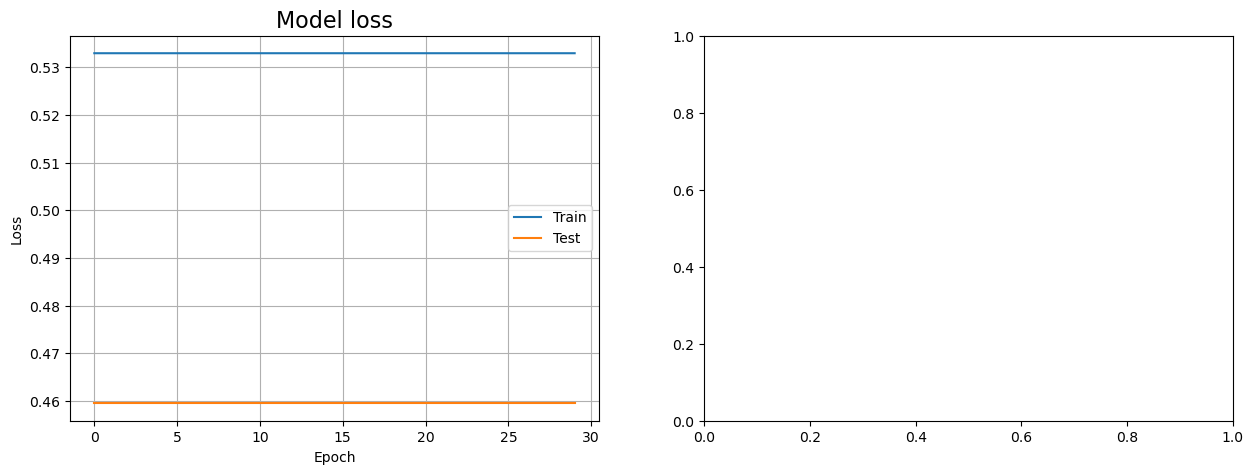

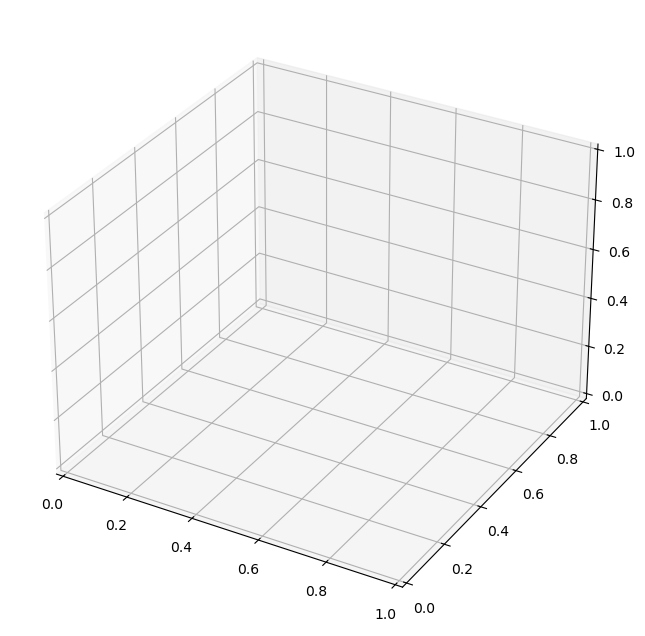

In [7]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize = 16)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'best')
plt.grid()


# Compare the model prediction with the target function

# generate predictions
x_predicted = np.random.uniform(-2, 2, 100) 
y_predicted = np.random.uniform(-2, 2, 100)
X_predicted, Y_predicted = np.meshgrid(x_predicted, y_predicted)
input_predicted = np.column_stack((x_predicted, y_predicted))
Z_predicted = model.predict(input_predicted)

plt.subplot(1,2,2)

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_predicted, Y_predicted, z_predicted, c='r', marker='o')

x_predicted.sort()
y_predicted.sort()
z_target_ext = f(x_predicted, y_predicted)
plt.axvline(1., color = 'g', linestyle = '--')
plt.axvline(-1., color = 'g', linestyle = '--')

plt.plot(input_predicted, z_target_ext, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#plt.plot(x_valid, y_target, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
#plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data')
plt.title("Validation data and target function", fontsize = 16)
plt.grid()
#plt.legend()
plt.show()


# Plot the surface
X_valid, Y_valid = np.meshgrid(x_valid, y_valid)
Z_target = f(X_valid, Y_valid)
ax.plot_surface(X_valid, Y_valid, Z_target, cmap='viridis')

# Scatter the data points
Z_valid = np.random.normal(f(X_valid, Y_valid), sigma)
ax.scatter(X_valid, Y_valid, Z_valid, c='r', marker='o')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#plt.plot(x_valid, y_target, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
#plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data')
plt.title("Validation data and target function", fontsize = 16)
plt.grid()
#plt.legend()
plt.show()